In [107]:
#File location and type
path = r"C:\Users\anton\OneDrive\Documentos\Georgian\BDAT_1011_Data_Analytics\test.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# Import csv. The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(path)

In [108]:
import pandas as pd

df = pd.read_csv(path)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#Calculating the field Meals

def func(row):
    if row['meal'] == 'BB':
        return "Bed and Breakfast"
    elif row['meal'] =='HB':
        return "Half Board"
    elif row['meal'] =='FB':
        return "Full board"
    elif row['meal'] =='SC':
        return "Undefined"
    else:
        return "Undefined"

df['Meals'] = df.apply(func, axis=1)

In [12]:
#Calculate the month Number

import calendar
d = dict((v,k) for k,v in enumerate(calendar.month_name))
df["MonthNumber"] = df.arrival_date_month.map(d)

#Calculate month name abbreviated
df['MonthName'] = df['MonthNumber'].apply(lambda x: calendar.month_abbr[x])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Meals,MonthNumber,MonthName
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Bed and Breakfast,7,Jul
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Bed and Breakfast,7,Jul
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,Bed and Breakfast,7,Jul
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,Bed and Breakfast,7,Jul
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,Bed and Breakfast,7,Jul


In [13]:
#Calculating the total nights and total people

df["Total_Nights"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]
df["Total_People"] = df["adults"] + df["babies"] + df["children"]

In [19]:
chart1 = df.groupby(["MonthNumber","MonthName"])['Total_Nights'].mean()
chart1

MonthNumber  MonthName
1            Jan          2.971496
2            Feb          3.031111
3            Mar          3.419338
4            Apr          3.366850
5            May          3.276567
6            Jun          3.575830
7            Jul          3.925835
8            Aug          3.896880
9            Sep          3.466407
10           Oct          3.126075
11           Nov          3.189137
12           Dec          3.222566
Name: Total_Nights, dtype: float64

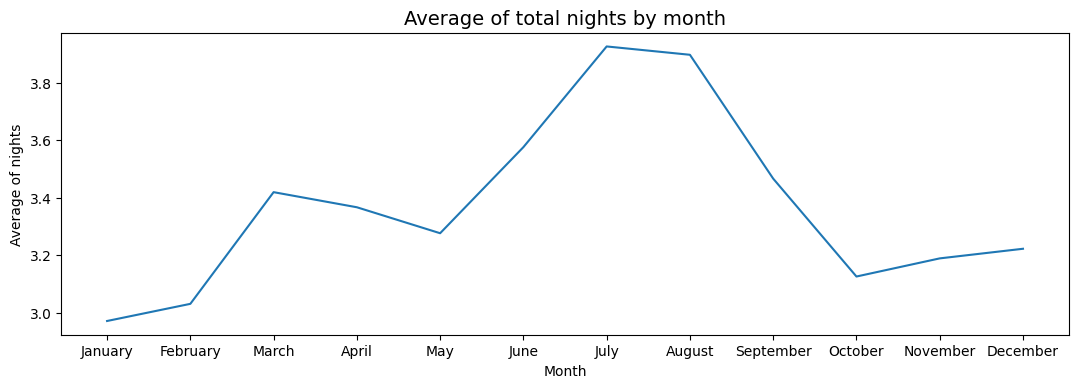

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [13, 4]
plt.rcParams['figure.dpi'] = 100

plt.title("Average of total nights by month", fontsize=14, fontweight=0)
plt.xlabel("Month")
plt.ylabel("Average of nights")
plt.plot(d.keys(), chart1.values)

<BarContainer object of 12 artists>

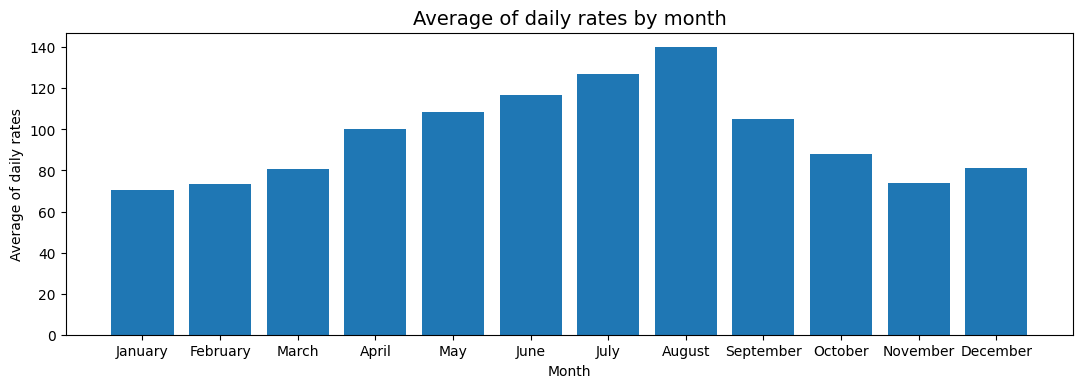

In [87]:
chart2 = df.groupby(["MonthNumber","MonthName"])['adr'].mean()
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [13, 4]
plt.rcParams['figure.dpi'] = 100

plt.title("Average of daily rates by month", fontsize=14, fontweight=0)
plt.xlabel("Month")
plt.ylabel("Average of daily rates")
plt.bar(d.keys(), chart2.values)

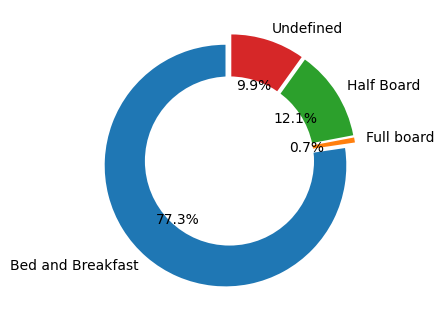

In [85]:
meals = df.groupby(['Meals']).count()

labels = meals.index.values

sizes = meals["Total_People"]
explode = (0.05, 0.05, 0.05, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)

plt.show()

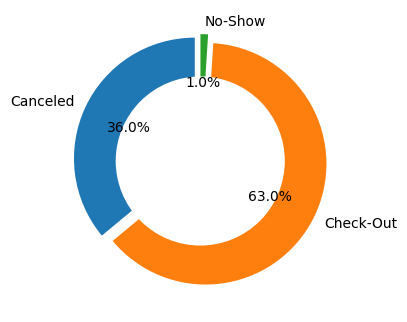

In [93]:
reservation = df.groupby(['reservation_status']).count()

labels = reservation.index.values

sizes = reservation["Total_People"]
explode = (0.05, 0.05, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)

plt.show()

In [111]:
#"https://github.com/datasets/geo-countries/blob/master/data/countries.geojson"
            
import plotly.graph_objects as go
country = df.groupby(['country']).count()
country

merged = gdf.merge(df, left_on='ADM0_A3', right_on='Country Code')
merged.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
country,,,,,,,,,,,,,,,,,,,,,
ABW,2,2,2,2,2,2,2,2,2,2,...,2,2,0,2,2,2,2,2,2,2
AGO,362,362,362,362,362,362,362,362,362,362,...,362,266,10,362,362,362,362,362,362,362
AIA,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
ALB,12,12,12,12,12,12,12,12,12,12,...,12,10,2,12,12,12,12,12,12,12
AND,7,7,7,7,7,7,7,7,7,7,...,7,7,0,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
VNM,8,8,8,8,8,8,8,8,8,8,...,8,8,0,8,8,8,8,8,8,8
ZAF,80,80,80,80,80,80,80,80,80,80,...,80,73,1,80,80,80,80,80,80,80


In [110]:
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
